https://medium.com/analytics-vidhya/exploratory-data-analysis-of-google-fit-data-with-pandas-and-seaborn-a4369366c543

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os,fnmatch
import matplotlib as mpl
import matplotlib.cm as cm
import calendar

In [2]:
activity_logs="../MyGoogleFit/Fit/Daily Aggregations"
os.listdir(activity_logs)

['2020-06-26.csv',
 '2020-11-23.csv',
 '2020-06-25.csv',
 '2020-06-20.csv',
 '2020-07-06.csv',
 '2020-06-21.csv',
 '2020-11-26.csv',
 '2020-06-28.csv',
 '2020-06-24.csv',
 '2020-06-17.csv',
 '2020-06-29.csv',
 '2020-06-27.csv',
 '2020-06-18.csv',
 '2020-07-01.csv',
 '2020-06-19.csv',
 '2020-11-21.csv',
 '2020-11-20.csv',
 '2020-06-30.csv',
 '2020-11-22.csv',
 '2020-11-25.csv',
 '2020-06-16.csv',
 'Daily Summaries.csv',
 '2020-07-03.csv',
 '2020-06-22.csv',
 '2020-06-23.csv',
 '2020-11-27.csv',
 '2020-07-04.csv',
 '2020-11-24.csv',
 '2020-07-02.csv',
 '2020-07-07.csv',
 '2020-07-08.csv',
 '2020-07-05.csv']

In [3]:
# example df of day file
df_example = pd.read_csv(activity_logs + "/2020-07-05.csv")
df_example.head()

,Start time,End time,Average weight (kg),Max weight (kg),Min weight (kg),Calories (kcal),Heart Points,Heart Minutes,Low latitude (deg),Low longitude (deg),...,High longitude (deg),Step count,Distance (m),Average speed (m/s),Max speed (m/s),Min speed (m/s),Move Minutes count,Biking duration (ms),Inactive duration (ms),Walking duration (ms)
0,00:00:00.000-04:00,00:15:00.000-04:00,NaN,NaN,NaN,16.296875,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900000.0,NaN
1,00:15:00.000-04:00,00:30:00.000-04:00,NaN,NaN,NaN,16.296875,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900000.0,NaN
2,00:30:00.000-04:00,00:45:00.000-04:00,NaN,NaN,NaN,16.296875,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900000.0,NaN
3,00:45:00.000-04:00,01:00:00.000-04:00,NaN,NaN,NaN,16.296875,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900000.0,NaN
4,01:00:00.000-04:00,01:15:00.000-04:00,NaN,NaN,NaN,16.296875,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900000.0,NaN


In [4]:
df_by_day = []
chosen_columns = ["activity_dttm", "Calories (kcal)" ,"Distance (m)", "Step count", "Walking duration (ms)", "Biking duration (ms)"]

for daily_file in fnmatch.filter(os.listdir(activity_logs),"2020*.csv"):
    #print(daily_file)
    
    # load the file into a data frame 
    df_raw = pd.read_csv(activity_logs + "/" + daily_file)
    try:
        date = daily_file.split(".")[0]
        time = df_raw["Start time"].str[:8]
        # join the file's date with the activity start time rounded down to the hour
        # https://pandas.pydata.org/pandas-docs/stable/whatsnew/v0.15.0.html#whatsnew-0150-dt
        df_raw["activity_dttm"] = pd.to_datetime(date + " " + time).dt.floor('h')
        df_by_day.append(df_raw[chosen_columns])
    except:
        pass
df_activities = pd.concat(df_by_day).fillna(0)
df_activities.columns=chosen_columns
# Reset Index
df_activities.index = pd.RangeIndex(len(df_activities.index))
df_activities

,activity_dttm,Calories (kcal),Distance (m),Step count,Walking duration (ms),Biking duration (ms)
0,2020-06-25 00:00:00,16.296875,0.000000,0.0,0.0,0.0
1,2020-06-25 00:00:00,16.296875,0.000000,0.0,0.0,0.0
2,2020-06-25 00:00:00,16.296875,0.000000,0.0,0.0,0.0
3,2020-06-25 00:00:00,16.296875,0.000000,0.0,0.0,0.0
4,2020-06-25 01:00:00,16.296875,0.000000,0.0,0.0,0.0
5,2020-06-25 01:00:00,16.296875,0.000000,0.0,0.0,0.0
6,2020-06-25 01:00:00,16.296875,0.000000,0.0,0.0,0.0
7,2020-06-25 01:00:00,16.296875,0.000000,0.0,0.0,0.0
8,2020-06-25 02:00:00,16.296875,0.000000,0.0,0.0,0.0
9,2020-06-25 02:00:00,16.296875,0.000000,0.0,0.0,0.0


### Daily Aggregations

Aggregate the walking information by day and calculate the daily walking duration in minutes.

In [5]:
df_daily_group = df_activities.groupby([df_activities['activity_dttm'].values.astype('datetime64[D]')]).sum()

df_daily_group["Walking duration (min)"] = df_daily_group["Walking duration (ms)"].apply(lambda ms : np.floor(ms / 60000))
df_daily_group["Biking duration (min)"] = df_daily_group["Biking duration (ms)"].apply(lambda ms : np.floor(ms / 60000))

df_daily_group = df_daily_group.drop('Walking duration (ms)', axis=1)
df_daily_group = df_daily_group.drop('Biking duration (ms)', axis=1)

df_daily_group["Day"] = df_daily_group.index
df_daily_group.index = pd.RangeIndex(len(df_daily_group))
df_daily_group

,Calories (kcal),Distance (m),Step count,Walking duration (min),Biking duration (min),Day
0,2199.288362,6814.508834,9970.0,69.0,116.0,2020-06-18
1,1993.559319,3878.861245,6438.0,26.0,107.0,2020-06-21
2,1906.614046,2144.876408,4211.0,26.0,83.0,2020-06-25
3,2112.751256,5375.318575,9048.0,89.0,88.0,2020-06-27
4,2405.804396,7099.700578,9966.0,21.0,241.0,2020-06-28
5,1862.822380,1423.253676,2871.0,19.0,71.0,2020-06-29
6,1616.083262,4019.619445,6350.0,15.0,25.0,2020-06-30
7,2998.827058,1707.980200,3257.0,19.0,380.0,2020-07-01
8,1854.400700,1710.519140,3428.0,19.0,76.0,2020-07-05
9,1928.382279,1483.965396,2798.0,15.0,87.0,2020-07-06


In [6]:
df_daily_group.nlargest(5,"Step count")[["Distance (m)","Step count","Day"]]

,Distance (m),Step count,Day
0,6814.508834,9970.0,2020-06-18
4,7099.700578,9966.0,2020-06-28
3,5375.318575,9048.0,2020-06-27
1,3878.861245,6438.0,2020-06-21
6,4019.619445,6350.0,2020-06-30


### Weekly walking distance

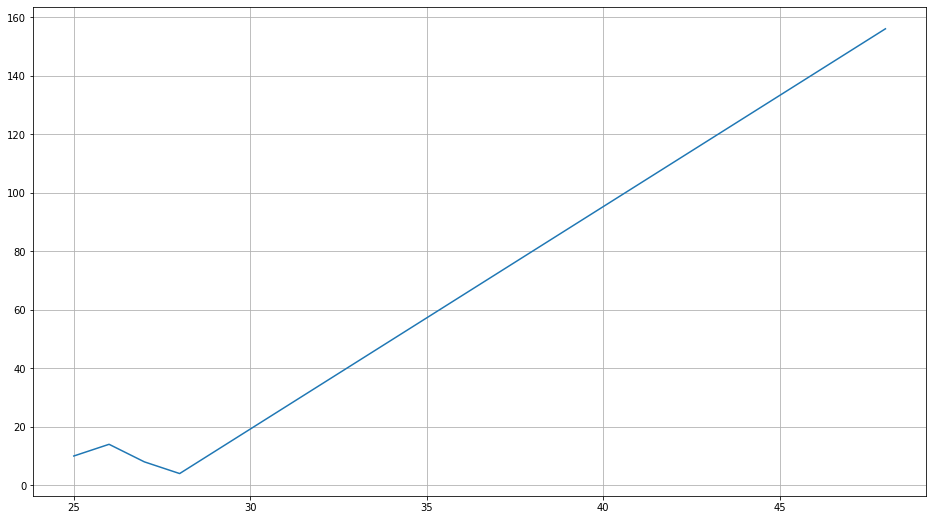

In [7]:
df_daily_group["Week number"] = df_daily_group.Day.dt.weekofyear
df_weekly_group = df_daily_group.groupby('Week number').sum()
df_weekly_group['Distance (km)'] = df_weekly_group['Distance (m)'].apply(lambda meters: np.floor(meters/1000))
plt.figure(figsize=(16,9))
plt.grid()
plt.plot(df_weekly_group["Distance (km)"])

In [8]:
df_daily_group

,Calories (kcal),Distance (m),Step count,Walking duration (min),Biking duration (min),Day,Week number
0,2199.288362,6814.508834,9970.0,69.0,116.0,2020-06-18,25
1,1993.559319,3878.861245,6438.0,26.0,107.0,2020-06-21,25
2,1906.614046,2144.876408,4211.0,26.0,83.0,2020-06-25,26
3,2112.751256,5375.318575,9048.0,89.0,88.0,2020-06-27,26
4,2405.804396,7099.700578,9966.0,21.0,241.0,2020-06-28,26
5,1862.822380,1423.253676,2871.0,19.0,71.0,2020-06-29,27
6,1616.083262,4019.619445,6350.0,15.0,25.0,2020-06-30,27
7,2998.827058,1707.980200,3257.0,19.0,380.0,2020-07-01,27
8,1854.400700,1710.519140,3428.0,19.0,76.0,2020-07-05,27
9,1928.382279,1483.965396,2798.0,15.0,87.0,2020-07-06,28


In [9]:
df_activities['activity_dttm'].values.astype('datetime64[M]')

array(['2020-06', '2020-06', '2020-06', ..., '2020-07', '2020-07',
       '2020-07'], dtype='datetime64[M]')

In [10]:
df_monthly_group = df_daily_group.groupby([
    df_daily_group['Day'].values.astype('datetime64[M]'),
    df_daily_group['Day'].values.astype('datetime64[D]')
]).sum()
df_monthly_group

Calories (kcal)  Distance (m)  Step count  \
2020-06-01 2020-06-18      2199.288362   6814.508834      9970.0   
           2020-06-21      1993.559319   3878.861245      6438.0   
           2020-06-25      1906.614046   2144.876408      4211.0   
           2020-06-27      2112.751256   5375.318575      9048.0   
           2020-06-28      2405.804396   7099.700578      9966.0   
           2020-06-29      1862.822380   1423.253676      2871.0   
           2020-06-30      1616.083262   4019.619445      6350.0   
2020-07-01 2020-07-01      2998.827058   1707.980200      3257.0   
           2020-07-05      1854.400700   1710.519140      3428.0   
           2020-07-06      1928.382279   1483.965396      2798.0   
           2020-07-07      1651.923738   2244.749076      4357.0   
           2020-07-08      2188.009298   1175.473867      2137.0   
2020-11-01 2020-11-24      1706.805641   2024.982865      3521.0   
           2020-11-25      2673.222559  46846.005817      3910.0   
           2020-11-26      2919.521699  60986.505865      3570.0   
           2020-11-27      1958.314743  46905.264764      3224.0   

                       Walking duration (min)  Biking duration (min)  \
2020-06-01 2020-06-18                    69.0                  116.0   
           2020-06-21                    26.0                  107.0   
           2020-06-25                    26.0                   83.0   
           2020-06-27                    89.0                   88.0   
           2020-06-28                    21.0                  241.0   
           2020-06-29                    19.0                   71.0   
           2020-06-30                    15.0                   25.0   
2020-07-01 2020-07-01                    19.0                  380.0   
           2020-07-05                    19.0                   76.0   
           2020-07-06                    15.0                   87.0   
           2020-07-07                    30.0                    9.0   
           2020-07-08                    15.0                  261.0   
2020-11-01 2020-11-24                    11.0                   20.0   
           2020-11-25                    23.0                   90.0   
           2020-11-26                    20.0                  120.0   
           2020-11-27                    12.0                   90.0   

                       Week number  
2020-06-01 2020-06-18           25  
           2020-06-21           25  
           2020-06-25           26  
           2020-06-27           26  
           2020-06-28           26  
           2020-06-29           27  
           2020-06-30           27  
2020-07-01 2020-07-01           27  
           2020-07-05           27  
           2020-07-06           28  
           2020-07-07           28  
           2020-07-08           28  
2020-11-01 2020-11-24           48  
           2020-11-25           48  
           2020-11-26           48  
           2020-11-27           48

In [11]:
df_monthly_group["Activity day"] = df_monthly_group.index.get_level_values(1)
df_monthly_group

Calories (kcal)  Distance (m)  Step count  \
2020-06-01 2020-06-18      2199.288362   6814.508834      9970.0   
           2020-06-21      1993.559319   3878.861245      6438.0   
           2020-06-25      1906.614046   2144.876408      4211.0   
           2020-06-27      2112.751256   5375.318575      9048.0   
           2020-06-28      2405.804396   7099.700578      9966.0   
           2020-06-29      1862.822380   1423.253676      2871.0   
           2020-06-30      1616.083262   4019.619445      6350.0   
2020-07-01 2020-07-01      2998.827058   1707.980200      3257.0   
           2020-07-05      1854.400700   1710.519140      3428.0   
           2020-07-06      1928.382279   1483.965396      2798.0   
           2020-07-07      1651.923738   2244.749076      4357.0   
           2020-07-08      2188.009298   1175.473867      2137.0   
2020-11-01 2020-11-24      1706.805641   2024.982865      3521.0   
           2020-11-25      2673.222559  46846.005817      3910.0   
           2020-11-26      2919.521699  60986.505865      3570.0   
           2020-11-27      1958.314743  46905.264764      3224.0   

                       Walking duration (min)  Biking duration (min)  \
2020-06-01 2020-06-18                    69.0                  116.0   
           2020-06-21                    26.0                  107.0   
           2020-06-25                    26.0                   83.0   
           2020-06-27                    89.0                   88.0   
           2020-06-28                    21.0                  241.0   
           2020-06-29                    19.0                   71.0   
           2020-06-30                    15.0                   25.0   
2020-07-01 2020-07-01                    19.0                  380.0   
           2020-07-05                    19.0                   76.0   
           2020-07-06                    15.0                   87.0   
           2020-07-07                    30.0                    9.0   
           2020-07-08                    15.0                  261.0   
2020-11-01 2020-11-24                    11.0                   20.0   
           2020-11-25                    23.0                   90.0   
           2020-11-26                    20.0                  120.0   
           2020-11-27                    12.0                   90.0   

                       Week number Activity day  
2020-06-01 2020-06-18           25   2020-06-18  
           2020-06-21           25   2020-06-21  
           2020-06-25           26   2020-06-25  
           2020-06-27           26   2020-06-27  
           2020-06-28           26   2020-06-28  
           2020-06-29           27   2020-06-29  
           2020-06-30           27   2020-06-30  
2020-07-01 2020-07-01           27   2020-07-01  
           2020-07-05           27   2020-07-05  
           2020-07-06           28   2020-07-06  
           2020-07-07           28   2020-07-07  
           2020-07-08           28   2020-07-08  
2020-11-01 2020-11-24           48   2020-11-24  
           2020-11-25           48   2020-11-25  
           2020-11-26           48   2020-11-26  
           2020-11-27           48   2020-11-27

In [12]:
df_monthly_group.index = df_monthly_group.index.get_level_values(0)
df_monthly_group

,Calories (kcal),Distance (m),Step count,Walking duration (min),Biking duration (min),Week number,Activity day
2020-06-01,2199.288362,6814.508834,9970.0,69.0,116.0,25,2020-06-18
2020-06-01,1993.559319,3878.861245,6438.0,26.0,107.0,25,2020-06-21
2020-06-01,1906.614046,2144.876408,4211.0,26.0,83.0,26,2020-06-25
2020-06-01,2112.751256,5375.318575,9048.0,89.0,88.0,26,2020-06-27
2020-06-01,2405.804396,7099.700578,9966.0,21.0,241.0,26,2020-06-28
2020-06-01,1862.822380,1423.253676,2871.0,19.0,71.0,27,2020-06-29
2020-06-01,1616.083262,4019.619445,6350.0,15.0,25.0,27,2020-06-30
2020-07-01,2998.827058,1707.980200,3257.0,19.0,380.0,27,2020-07-01
2020-07-01,1854.400700,1710.519140,3428.0,19.0,76.0,27,2020-07-05
2020-07-01,1928.382279,1483.965396,2798.0,15.0,87.0,28,2020-07-06


In [13]:
df_monthly_group["Month"] = df_monthly_group.index.month
df_monthly_group

,Calories (kcal),Distance (m),Step count,Walking duration (min),Biking duration (min),Week number,Activity day,Month
2020-06-01,2199.288362,6814.508834,9970.0,69.0,116.0,25,2020-06-18,6
2020-06-01,1993.559319,3878.861245,6438.0,26.0,107.0,25,2020-06-21,6
2020-06-01,1906.614046,2144.876408,4211.0,26.0,83.0,26,2020-06-25,6
2020-06-01,2112.751256,5375.318575,9048.0,89.0,88.0,26,2020-06-27,6
2020-06-01,2405.804396,7099.700578,9966.0,21.0,241.0,26,2020-06-28,6
2020-06-01,1862.822380,1423.253676,2871.0,19.0,71.0,27,2020-06-29,6
2020-06-01,1616.083262,4019.619445,6350.0,15.0,25.0,27,2020-06-30,6
2020-07-01,2998.827058,1707.980200,3257.0,19.0,380.0,27,2020-07-01,7
2020-07-01,1854.400700,1710.519140,3428.0,19.0,76.0,27,2020-07-05,7
2020-07-01,1928.382279,1483.965396,2798.0,15.0,87.0,28,2020-07-06,7


In [17]:
# convert step count to 1000s
df_monthly_group['Step Count (1000s)'] = df_monthly_group["Step count"].apply(lambda x: np.floor(x/1000))
df_monthly_group['Weekday'] = df_monthly_group['Activity day'].apply(lambda x: 'Y' if x.weekday() < 5 else 'N')
df_monthly_group_2020=df_monthly_group["2020"]
df_monthly_group_2020

,Calories (kcal),Distance (m),Step count,Walking duration (min),Biking duration (min),Week number,Activity day,Month,Step Count (1000s),Weekday
2020-06-01,2199.288362,6814.508834,9970.0,69.0,116.0,25,2020-06-18,6,9.0,Y
2020-06-01,1993.559319,3878.861245,6438.0,26.0,107.0,25,2020-06-21,6,6.0,N
2020-06-01,1906.614046,2144.876408,4211.0,26.0,83.0,26,2020-06-25,6,4.0,Y
2020-06-01,2112.751256,5375.318575,9048.0,89.0,88.0,26,2020-06-27,6,9.0,N
2020-06-01,2405.804396,7099.700578,9966.0,21.0,241.0,26,2020-06-28,6,9.0,N
2020-06-01,1862.822380,1423.253676,2871.0,19.0,71.0,27,2020-06-29,6,2.0,Y
2020-06-01,1616.083262,4019.619445,6350.0,15.0,25.0,27,2020-06-30,6,6.0,Y
2020-07-01,2998.827058,1707.980200,3257.0,19.0,380.0,27,2020-07-01,7,3.0,Y
2020-07-01,1854.400700,1710.519140,3428.0,19.0,76.0,27,2020-07-05,7,3.0,N
2020-07-01,1928.382279,1483.965396,2798.0,15.0,87.0,28,2020-07-06,7,2.0,Y


### How are my walking distances distributed month to month?

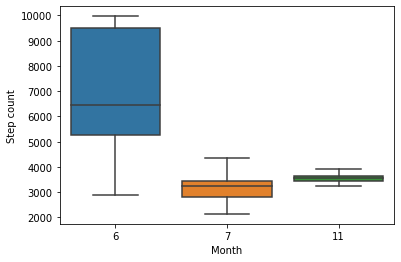

In [18]:
sns.boxplot(df_monthly_group_2020['Month'], df_monthly_group_2020['Step count'])

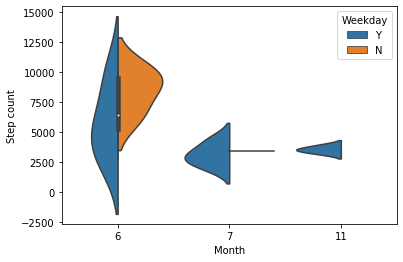

In [22]:
sns.violinplot(df_monthly_group_2020['Month'], df_monthly_group_2020['Step count'], 
               hue=df_monthly_group_2020['Weekday'], split=True)

In [43]:
df_activities["hour"] = df_activities.activity_dttm.dt.hour
df_activities["date"] =  df_activities.activity_dttm.dt.date
df_2020_wk = df_activities[df_activities.activity_dttm.dt.week==28]
weekly_timewheel_data = pd.pivot_table(df_2020_wk,
                                       index=["date"],
                                       columns=["hour"],
                                       values=["Step count"],
                                       fill_value = 0,
                                       aggfunc=[np.sum])

weekly_timewheel_data.columns = [column_name[2] for column_name in weekly_timewheel_data.columns]
weekly_timewheel_data.index = [calendar.day_name[i.weekday()] for i in weekly_timewheel_data.index]
weekly_timewheel_data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Monday,0,0,0,0,0,0,0,8,0,258,...,58,247,250,12,173,532,55,762,23,265
Tuesday,295,15,0,0,0,0,15,0,122,237,...,0,220,317,28,291,1114,0,333,301,430
Wednesday,0,0,0,0,0,0,7,443,245,345,...,695,68,0,121,0,0,0,0,0,0


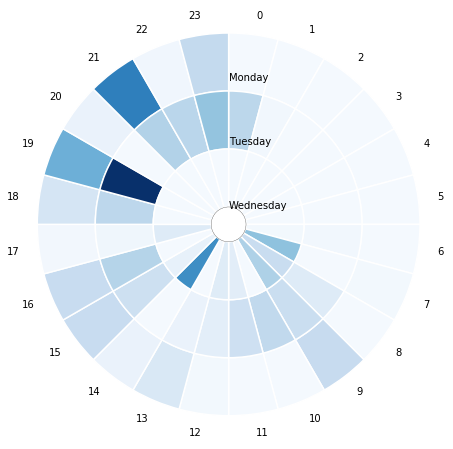

In [45]:
# https://stackoverflow.com/questions/40352607/time-wheel-in-python3-pandas
def pie_heatmap(table, cmap=cm.hot, vmin=None, vmax=None,inner_r=0.25, pie_args={}):
    n, m = table.shape
    vmin= table.min().min() if vmin is None else vmin
    vmax= table.max().max() if vmax is None else vmax

    centre_circle = plt.Circle((0,0),inner_r,edgecolor='black',facecolor='white',fill=True,linewidth=0.25)
    plt.gcf().gca().add_artist(centre_circle)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=1.1*vmax)
    cmapper = cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
    for i, (row_name, row) in enumerate(table.iterrows()):
        labels = None if i > 0 else table.columns
        wedges = plt.pie([1] * m,radius=inner_r+float(n-i)/n, colors=[cmapper.to_rgba(x) for x in row.values], 
            labels=labels, startangle=90, counterclock=False, wedgeprops={'linewidth':-1}, **pie_args)
        plt.setp(wedges[0], edgecolor='white',linewidth=1.5)
        wedges = plt.pie([1], radius=inner_r+float(n-i-1)/n, colors=['w'], labels=[row_name], startangle=-90, wedgeprops={'linewidth':0})
        plt.setp(wedges[0], edgecolor='white',linewidth=1.5)

plt.figure(figsize=(8,8))
pie_heatmap(weekly_timewheel_data, vmin=-20,vmax=1000,inner_r=0.1)
plt.show();